# Support Vector Machines (SVM)

**Brief History:**

Support Vector Machines, or SVMs, trace their origins to the 1960s. Originally introduced by Vladimir Vapnik and Alexey Chervonenkis, it wasn't until the 1990s, when Vapnik along with Corinna Cortes revisited the idea, that SVMs became a cornerstone in the field of machine learning. Their re-introduction of SVMs showcased the technique's superior performance, especially in classification tasks, compared to the popular algorithms of that era. The combination of mathematical robustness and practical efficacy catapulted SVMs into widespread use.

**Motivation:**

Imagine having a collection of apples and oranges on a table and wanting to separate them using a straight stick. The most intuitive way might be to place the stick where it best divides the two fruit types. But what if there are multiple ways to do it? Which one is the best? The idea behind SVM is similar. Instead of just drawing any decision boundary between the data points of two classes, SVM aims to find the one that best separates them, providing the maximum possible margin.

The power of SVM comes from its mathematical foundation. By transforming the data into higher-dimensional spaces using what is known as the 'kernel trick', SVMs can find the optimal hyperplane (or decision boundary) that not only separates the data but also does so in a way that is robust to outliers and minor perturbations. This robustness ensures that new data points are classified with higher accuracy.

**Use Cases:**

SVMs are versatile and have been employed in a wide array of applications, including but not limited to:

1. **Image Classification:** SVMs have been used in hand-written digit recognition and face detection tasks.
   
2. **Text Classification:** From sentiment analysis to topic categorization, SVMs have shown strong performance in handling text data.
   
3. **Bioinformatics:** SVMs have found applications in classifying genes, patients, and other biological entities.
   
4. **Financial Forecasting:** By recognizing patterns in financial data, SVMs can be trained to predict stock market trends.
   
5. **Anomaly Detection:** SVMs can be employed in situations where anomalies or outliers need to be detected, such as in credit card fraud detection.

Though deep learning models, especially neural networks, have overshadowed SVMs in some applications (like computer vision), SVMs still remain popular due to their effectiveness, especially in situations where the dataset is smaller and less complex.

## Identifying the Decision Boundary

A decision boundary (or hyperplane in higher dimensions) is what separates the different classes within a dataset. For a two-dimensional dataset, this boundary is a line. In the following, I've drawn several potential decision boundaries that separate two classes of iris from the Iris dataset (Setosa and Versicolor).



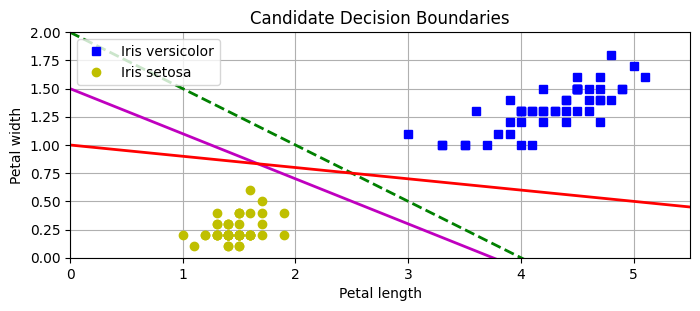

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# Alternative m,models
x0 = np.linspace(0, 5.5, 200)
pred_1 = -.5 * x0 + 2
pred_2 = -.4 * x0 + 1.5
pred_3 = -.1 * x0 + 1

plt.figure(figsize=(8,15))
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()
plt.title("Candidate Decision Boundaries")
plt.show()



**2. Margins:**

So how do we pick a decision bounday?  Which one is the "best"? To answer this, we define the margin as the distance between the decision boundary and the nearest data point from either class. The motivation behind SVM is to maximize this margin, thereby ensuring that the decision boundary is as far away from any data point as possible.

Here's why: A decision boundary with a larger margin is more robust. Think of it this way - if you had to walk on a tightrope (a decision boundary with a small margin) versus a broad pathway (a decision boundary with a large margin), which one would you be less likely to fall off from?

In SVM terminology:

- The **positive margin** is the distance between the decision boundary and the nearest positive example.
- The **negative margin** is the distance between the decision boundary and the nearest negative example.
  
The **overall margin** is the smaller of these two values, and the SVM aims to maximize this.

Using this idea, the best (largest) margin can be calculated as follows using a SVM based classifier.



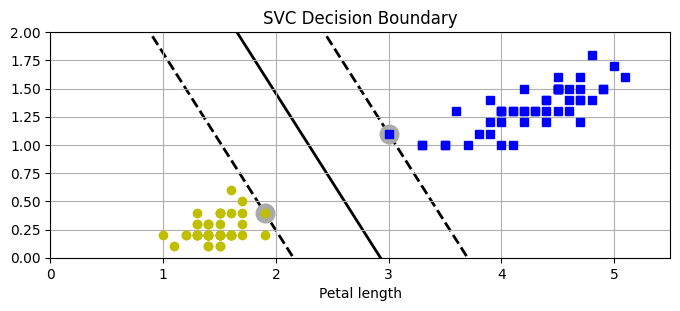

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets


# SVM Classifier model
svm_clf = SVC(kernel="linear", C=500)
svm_clf.fit(X, y)

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
                zorder=-1)

plt.figure(figsize=(8,15))
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()
plt.title("SVC Decision Boundary")
plt.show()

**3. Support Vectors:**

The preceding figure highlights a couple of data points. These are the *support vectors*. They are named so because they "support" or define the decision boundary. In essence:

- Support vectors are the data points that lie closest to the decision boundary.
- Only the support vectors determine the position of the decision boundary and its associated margin. The other points (not support vectors) can move around or even be removed without affecting the decision boundary, as long as they don't cross into the margin space.

**4. Hard Margin vs Soft Margin:**

While the primary goal of SVM is to maximize the margin, real-world data is often messy and may not be linearly separable. In such cases, trying to find a hyperplane that perfectly separates the classes can lead to overfitting or might not even be feasible.

- **Hard Margin SVM:** Assumes that the data is perfectly separable and tries to find a hyperplane with no violations (i.e., all points are on the correct side of the margin).
  
- **Soft Margin SVM:** Allows some violations to occur, where a few points may be on the wrong side of the margin or even the decision boundary. This is where the regularization parameter, `C`, comes in. A smaller `C` allows more violations but can generalize better, while a larger `C` tries to classify all training examples correctly, risking overfitting.



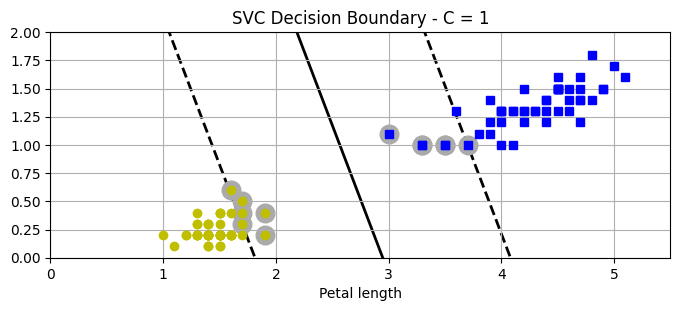

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets


# SVM Classifier model
svm_clf = SVC(kernel="linear", C=.1)
svm_clf.fit(X, y)

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
                zorder=-1)

plt.figure(figsize=(8,15))
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()
plt.title("SVC Decision Boundary - C = 1")
plt.show()




**In Summary:**

The SVM objective is a delicate balancing act:

- It aims to find the widest possible margin to separate the classes, ensuring a more robust classifier.
- It relies on the support vectors to define this margin and decision boundary.
- And it provides flexibility with the soft margin approach to handle non-perfectly separable data, preventing overfitting.

### The importance of scaling

SVMs, at their core, are distance-based algorithms. The primary objective of SVM is to find a hyperplane that maximizes the margin between two classes. This margin is essentially the distance between the hyperplane and the nearest data point from either class (the support vectors). Thus, the computation of this margin is inherently dependent on the scale or units of the features.

Imagine two features: one represents height in millimeters (ranging between 1500-2000 for most adults) and another represents weight in stones (ranging between 7-17 for many adults). Given the vast difference in the scale of their values, the distance computations (and hence the SVM's decision boundary) would be overwhelmingly dominated by the height feature. As a result, the weight feature's contribution would become almost negligible, even if it is crucial for the classification task.

The following example illustrates the impact of scaling.

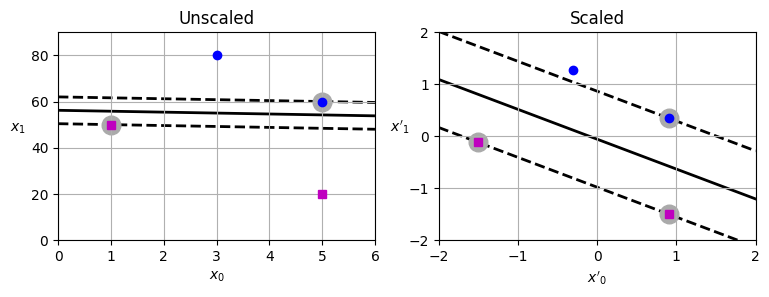

In [4]:
from sklearn.preprocessing import StandardScaler

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100).fit(Xs, ys)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf_scaled = SVC(kernel="linear", C=100).fit(X_scaled, ys)

plt.figure(figsize=(9, 2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$    ", rotation=0)
plt.title("Unscaled")
plt.axis([0, 6, 0, 90])
plt.grid()

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$  ", rotation=0)
plt.title("Scaled")
plt.axis([-2, 2, -2, 2])
plt.grid()

plt.show()

## Non linearly separable data

To deal with data that does not have a simple linear decision boundary, we can apply what is called the "kernel trick." At its most basic, a **kernel** is a function that takes two inputs and returns a scalar output. It essentially computes a measure of similarity between the inputs. In machine learning, this similarity often pertains to data points. Given two vectors, a kernel measures how "similar" they are without explicitly computing a potentially expensive (in terms of computation or even feasibility) operation.

Many machine learning algorithms involve operations in high-dimensional spaces or computations that would be computationally expensive. Instead of directly computing these operations, the kernel provides a shortcut--this is referred to as the "kernel trick." It computes the results of the high-dimensional operations without explicitly visiting the high-dimensional space.

**Kernels and Support Vector Machines**

Recall our discussion on the decision boundary and margin. For many datasets, a linear decision boundary might not suffice. Imagine a simple scenario where the data points lie on a single line, where extrema form one class and points closer to the median for the other. However, what if we could transform our data such that it becomes linearly separable?

This is where kernels come into play. Instead of separating the classes in the original space, a kernel transforms the data into a higher-dimensional space. In this new space, the data becomes linearly separable, allowing SVM to find a decision boundary.


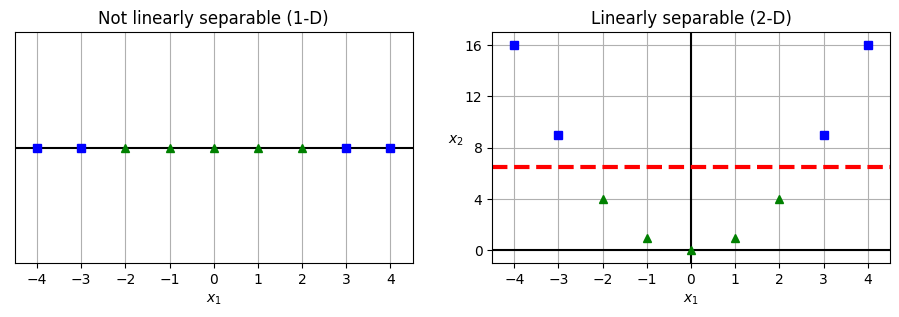

In [5]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel("$x_1$")
plt.title("Not linearly separable (1-D)")
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$  ", rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.title("Linearly separable (2-D)")
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

plt.show()

In the preceding example, we mapped 1-D data into a 2-D space using the transformation Certainly. $\phi(x) = x^2$. We want to find a kernel function that computes dot products in the transformed space without actually going there.

Firstly, let's understand the transformation:

Given a data point $x$, its transformed feature is $\phi(x) = x^2$. 

Now, consider two data points $x_i$ and $x_j$ from your 1D array. After applying the transformation $\phi$ to both, we have:

$ \phi(x_i) = x_i^2$
$\phi(x_j) = x_j^2$

The dot product in the transformed space between $\phi(x_i)$ and $\phi(x_j)$ is:

$\phi(x_i) \cdot \phi(x_j) = (x_i^2) (x_j^2)$

However, the above multiplication is exactly what you'd get if you raise their original dot product to the power of 2 (because in 1D, dot product is just normal multiplication):

$(x_i \cdot x_j)^2 = (x_i x_j)^2$

This suggests a polynomial kernel of degree 2:

$K(x_i, x_j) = (x_i \cdot x_j + c)^d$

For our case, if $c = 0$ and $d = 2$, it simplifies to:

$K(x_i, x_j) = (x_i x_j)^2$

So, for this transformation $\phi(x) = x^2$, the kernel function that computes the dot product in the transformed space without explicitly mapping the data points to that space is $K(x_i, x_j) = (x_i x_j)^2$.

### Example: The polynomial kernel

We can illustrates the effect and derivation of a kernel by explicitly transforming our features before processing.  First, we'll make some data that isn't linearly separable.

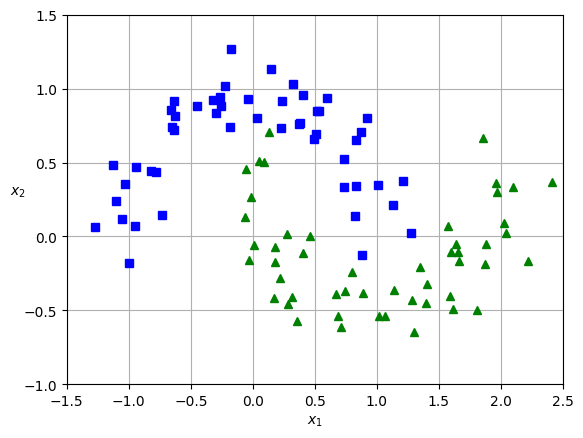

In [6]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)



def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

Attempting to run a LinearSVM on the above data yields this:

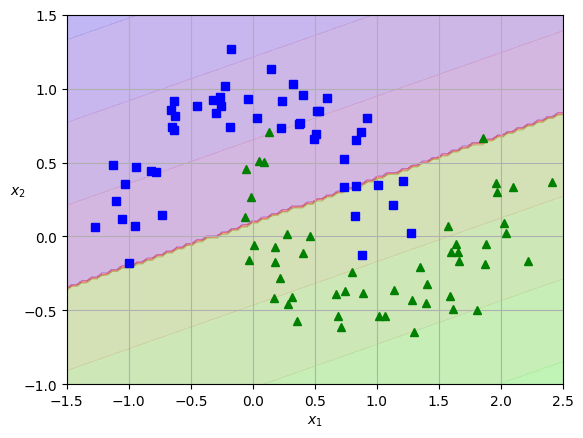

In [7]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

linear_svm_clf = make_pipeline(
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, random_state=42)
)
linear_svm_clf.fit(X, y)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(linear_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

The `PolynomialFeatures' transformation transforms features into a higher order polynomial, like this:

In [8]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
print(pd.DataFrame(X).head())

pf = PolynomialFeatures(degree=2)
pd.DataFrame(pf.fit_transform(X),columns=pf.get_feature_names_out())

          0         1
0  1.613838 -0.491151
1  0.089847  0.504391
2  0.747210 -0.369111
3 -1.101745  0.236856
4 -0.728715  0.146523


,1,x0,x1,x0^2,x0 x1,x1^2
0,1.0,1.613838,-0.491151,2.604474,-0.792638,0.241229
1,1.0,0.089847,0.504391,0.008073,0.045318,0.254410
2,1.0,0.747210,-0.369111,0.558323,-0.275804,0.136243
3,1.0,-1.101745,0.236856,1.213842,-0.260955,0.056101
4,1.0,-0.728715,0.146523,0.531025,-0.106774,0.021469
...,...,...,...,...,...,...
95,1.0,0.182507,-0.171043,0.033309,-0.031217,0.029256
96,1.0,1.016426,-0.540019,1.033122,-0.548890,0.291621
97,1.0,0.513586,0.695090,0.263771,0.356988,0.483150
98,1.0,1.880611,-0.052909,3.536699,-0.099502,0.002799


Using a 3rd degree polynomial and then running a linear SVM gives us this:

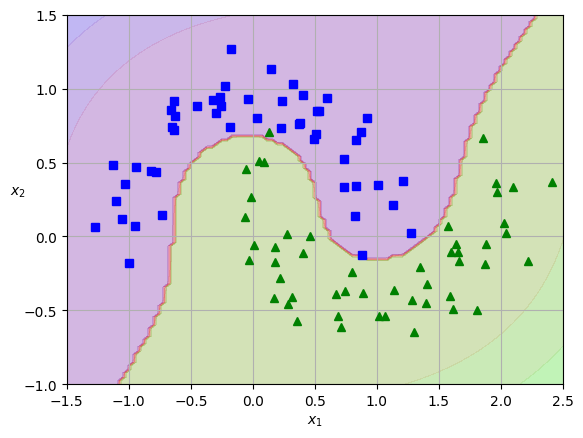

In [9]:
polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, random_state=42)
)
polynomial_svm_clf.fit(X, y)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

However, instead of transforming our features, we can simply use a polynomial kernel to accomplish the same thing:

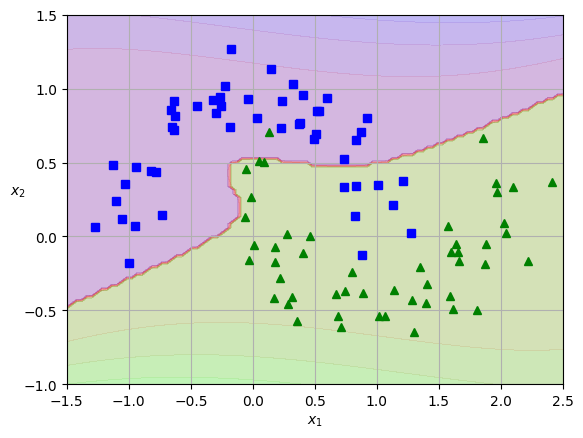

In [10]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly",degree=3,C=10, max_iter=10_000, random_state=42)
)
polynomial_svm_clf.fit(X, y)


def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

Note that while applying a polynomial kernel and manually transforming features are conceptually similar, they are not identical!

**Unpacking the polynomial kernel**

The polynomial kernel is defined as:

$ K(x, y) = (x \cdot y + c)^d $

Where:
- $x$ and $y$ are data vectors.
- $c$ is a constant (usually 1).
- $d$ is the degree of the polynomial.

To understand the kernel trick with the polynomial kernel, consider a simple case where $d = 2$ (a quadratic kernel) and $c = 1$, and our data vectors are two-dimensional:

$x = (x_1, x_2)$
$y = (y_1, y_2)$

Compute the dot product, then raise it to the power of 2:

$K(x, y) = (x \cdot y + 1)^2$
$ = (x_1y_1 + x_2y_2 + 1)^2$
$ = x_1^2y_1^2 + 2x_1y_1 + x_2^2y_2^2 + 2x_2y_2 + 2x_1y_1x_2y_2 + 1$

You can see from the expansion that the polynomial kernel implicitly maps the original two-dimensional vectors into a higher-dimensional space (6 dimensions in this example). 

If you were to explicitly create a transformation $\phi(x)$ such that you calculate the dot product in this high-dimensional space, for our vector $x$, it would be:

$\phi(x) = (x_1^2, \sqrt{2}x_1, x_2^2, \sqrt{2}x_2, \sqrt{2}x_1x_2, 1)$

Then, the dot product in the transformed space would be:

$\phi(x) \cdot \phi(y) = x_1^2y_1^2 + 2x_1y_1 + x_2^2y_2^2 + 2x_2y_2 + 2x_1y_1x_2y_2 + 1$

Which is the same as the result of our polynomial kernel!

**The Kernel Trick**

The "trick" is that we can compute the dot product in the high-dimensional space using the polynomial kernel directly in the original space without ever computing $\phi(x)$ or visiting the high-dimensional space. This saves immense computational resources, especially when the transformation $\phi$ maps into a very high-dimensional (or even infinite-dimensional) space.

In essence, the kernel trick allows SVMs to operate in high-dimensional spaces without incurring the computational costs associated with those dimensions. The polynomial kernel is just one example, and similar (but often more complex) logic applies to other kernels, like the RBF kernel.


### Common Kernels Used in SVMs

- **Linear Kernel:** The simplest form, equivalent to not applying any transformation. Use if the dataset is linearly separable or nearly linearly separable. It's less computationally expensive than other kernels. Always worth trying as a first step, as it can be surprising how often linear methods can be effective. If computational resources are limited, or if you have a very large dataset, the linear kernel might be a good choice due to its efficiency.
  
  $K(x, y) = x \cdot y$
  
- **Polynomial Kernel:** Applies a polynomial transformation to the data. If there's a reason to believe that the data could be separated not just by a line, but by some polynomial function. Increasing the degree of the polynomial increases the risk of overfitting. Cross-validation is crucial to find the right degree.
  
  $K(x, y) = (1 + x \cdot y)^d$
  
  where $d$ is the degree of the polynomial.
  
- **Radial Basis Function (RBF) or Gaussian Kernel:** One of the most popular kernels, it can map data into an infinite-dimensional space. Useful for non-linear problems. When there's no prior knowledge about the data, the RBF kernel is a good default choice.  Has an additional hyperparameter (gamma) to tune. If gamma is set too high, the decision boundary might be too strict and can overfit. If set too low, it might be too flexible and can underfit. Requires proper scaling of input features.
  
  $K(x, y) = e^{-\gamma \|x - y\|^2}$
  
  where $\gamma$ is a parameter that defines the shape of the decision boundary.

- **Sigmoid Kernel:** Similar to the neural network activation function. Historically used in neural networks. Less common in SVMs but can be useful for some types of data. Like the polynomial kernel, the sigmoid kernel is not always positive semi-definite, which can cause convergence issues.
  
  $K(x, y) = \tanh(\alpha x \cdot y + c)$
  
  where $\alpha$ and $c$ are constants.

### General Guidelines

- **Feature Scaling**: Kernels, especially the RBF, are sensitive to feature scaling. It's essential to normalize or standardize data before applying SVM with a kernel.
  
- **Cross-Validation**: Given that there are hyperparameters associated with most kernels (like the degree of the polynomial or the gamma of the RBF), using cross-validation to tune these hyperparameters is crucial.

- **Visual Inspection**: For lower-dimensional data, visualizing the data can give insights into whether the data is linearly separable or if there might be some non-linear patterns.

- **Start Simple**: It's often a good strategy to start with the linear kernel. If it's inadequate in terms of performance, then move to more complex kernels like the RBF.

- **Overfitting**: More complex kernels can capture intricate patterns in the data, but they can also overfit. If a non-linear kernel gives very high accuracy on training data but performs poorly on test data, it might be overfitting.

- **Computational Resources**: Training an SVM with a complex kernel on a large dataset can be computationally intensive. Consider the available resources and the size of the dataset when choosing a kernel.

In practice, there's no surefire way to know in advance which kernel will perform best for a given problem. It's a combination of domain knowledge, understanding of the data, and experimentation. Experimenting with different kernels and validating their performance on a held-out set or through cross-validation is the most reliable way to identify the best kernel for a specific problem.

## Exercise

The following code implements a simple SVC classifier.  Note that the data is unscaled.  Try the following:

1. Modify the code to use a standard scaler - use the `pipeline` approach illustrated above. Does it help?
2. Try different settings for `C` and `gamma` - what is your best?
2. Try using an 'rbf' kernel instead of a 'poly' kernel. Does it help?
3. Try several different parameters for `C` and `gamma`.  If you figure out how to do this in a loop, you win the day!

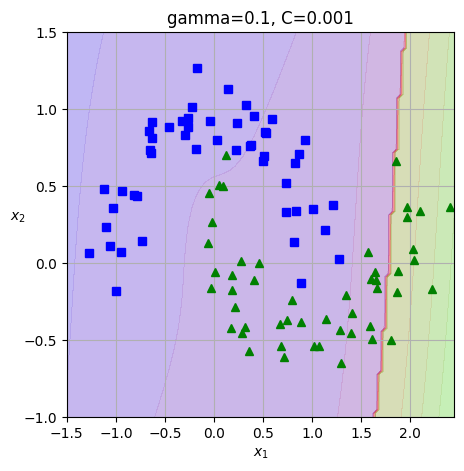

In [11]:
from sklearn.svm import SVC

gamma = 0.1
C = 0.001

svm_clf = SVC(kernel="poly",gamma = gamma, C = C)
svm_clf.fit(X, y)

plt.figure(figsize=(5,5))
plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
plt.title(f"gamma={gamma}, C={C}")
plt.show()